# IMMACULATE PENELOPE MWENDWA
# Data science parttime class
# TM-Samuel G


# Project Overview


![movie.jpg](https://th.bing.com/th/id/OIP.2E8TD9RbuTjt1Lcmb7q3tgHaHa?w=196&h=196&c=7&r=0&o=5&pid=1.7)

# Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
movie_gross_df=pd.read_csv("bom.movie_gross.csv.gz")
title_df=pd.read_csv("imdb.title.basics.csv.gz")
ratings_df=pd.read_csv("imdb.title.ratings.csv.gz")

In [99]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [100]:
movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [101]:
movie_gross_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [102]:
movie_gross_df.dropna(subset=['studio','domestic_gross','foreign_gross'],inplace=True)

# Title basics data

In [103]:
#shows the title and genres

In [104]:
title_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [105]:
movie_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

# Ratings

In [106]:
ratings_df.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [107]:
movie_gross_df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

# Data cleaning

In [108]:
#Changing domestic gross from object to float.
movie_gross_df['foreign_gross']=pd.to_numeric(movie_gross_df['foreign_gross'],errors='coerce')

In [109]:
#Dropping unnecessary columns
movie_gross_df.drop(columns=['studio'],axis=1,inplace=True)

In [110]:
#Dropping unnecessary columns
title_df.drop(columns=['start_year','runtime_minutes'],axis=1,inplace=True)

# Data merging

In [111]:
#combining two data sets,that is,title & ratings
merged_data_df=pd.merge(title_df,ratings_df,on='tconst')
merged_data_df.head()


,tconst,primary_title,original_title,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,"Comedy,Drama,Fantasy",6.5,119


In [112]:
#checking the number of values and columns
merged_data_df.shape

(73856, 6)

In [113]:
#combining the merged_data_df with the movie title
merged_movie_data=merged_data_df.merge(movie_gross_df.set_index(['title']),left_on='primary_title',right_index=True,how='inner')
merged_movie_data.head()


,tconst,primary_title,original_title,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
41,tt0337692,On the Road,On the Road,"Adventure,Drama,Romance",6.1,37886,744000.0,8000000.0,2012
45101,tt4339118,On the Road,On the Road,Drama,6.0,6,744000.0,8000000.0,2012
55547,tt5647250,On the Road,On the Road,Drama,5.7,127,744000.0,8000000.0,2012
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,58200000.0,129900000.0,2013
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,26300000.0,26900000.0,2014


In [114]:
merged_movie_data.isna().sum()

tconst            0
primary_title     0
original_title    0
genres            7
averagerating     0
numvotes          0
domestic_gross    0
foreign_gross     4
year              0
dtype: int64

In [115]:
merged_movie_data['genres'].value_counts()

Drama                         127
Comedy,Drama                   74
Adventure,Animation,Comedy     72
Comedy,Drama,Romance           66
Drama,Romance                  62
                             ... 
Comedy,Mystery,Sci-Fi           1
Action,Biography,Crime          1
Adventure,Mystery,Sci-Fi        1
Animation,Biography,Drama       1
Animation,Drama                 1
Name: genres, Length: 262, dtype: int64

In [116]:
merged_movie_data.head()

,tconst,primary_title,original_title,genres,averagerating,numvotes,domestic_gross,foreign_gross,year
41,tt0337692,On the Road,On the Road,"Adventure,Drama,Romance",6.1,37886,744000.0,8000000.0,2012
45101,tt4339118,On the Road,On the Road,Drama,6.0,6,744000.0,8000000.0,2012
55547,tt5647250,On the Road,On the Road,Drama,5.7,127,744000.0,8000000.0,2012
47,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,"Adventure,Comedy,Drama",7.3,275300,58200000.0,129900000.0,2013
51,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,"Action,Crime,Drama",6.5,105116,26300000.0,26900000.0,2014


In [117]:
#group genres by rating
genres_by_rating =merged_movie_data.groupby('genres')['averagerating'].sum().reset_index()
genres_by_rating

,genres,averagerating
0,Action,66.7
1,"Action,Adventure",12.1
2,"Action,Adventure,Animation",126.1
3,"Action,Adventure,Biography",28.0
4,"Action,Adventure,Comedy",163.2
...,...,...
257,"Romance,Sci-Fi,Thriller",7.1
258,"Romance,Thriller",11.7
259,Sci-Fi,4.2
260,Thriller,67.8


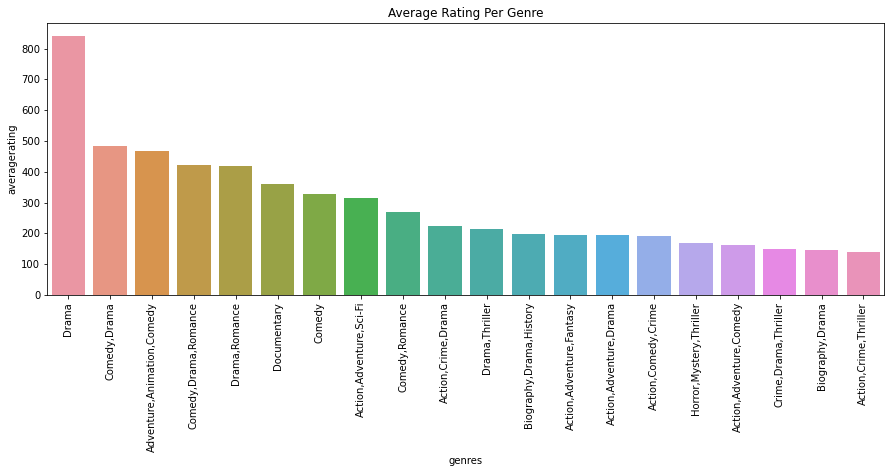

In [118]:

# Sort the DataFrame by 'averagerating' in descending order to find the top genres
genres_by_rating = genres_by_rating.sort_values(by='averagerating', ascending=False)

# Take only the top 10 genres
top_10_genres = genres_by_rating.head(20)
top_10_genres

plt.figure(figsize=(15,5))
sns.barplot(data=top_10_genres, x='genres', y='averagerating')
plt.title('Average Rating Per Genre')
plt.xticks(rotation=90)
plt.show()           

# Conclusion


 Microsoft should make a film in the drama genre as it has the highest average ratings